# **Code for Fashion MNIST Neural Network**


In this project, we will build a simple fully connected neural network (Multilayer Perceptron) using TensorFlow and Keras to classify images from the Fashion MNIST dataset. The dataset consists of 70,000 grayscale images, each belonging to one of 10 fashion categories.

### Steps:
1. **Load and preprocess the dataset**: We will normalize the pixel values of the images to the range [0, 1] to prepare them for the neural network.
2. **Build the model**: We will construct a neural network with one hidden layer using ReLU activation and a softmax output layer.
3. **Train the model**: The model will be trained on the Fashion MNIST training dataset.
4. **Evaluate the model**: We will test the trained model on the test dataset and visualize its performance.

Below is the code to load, preprocess the data, and set up the neural network:


## Loading and Preprocessing the Fashion MNIST Dataset

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


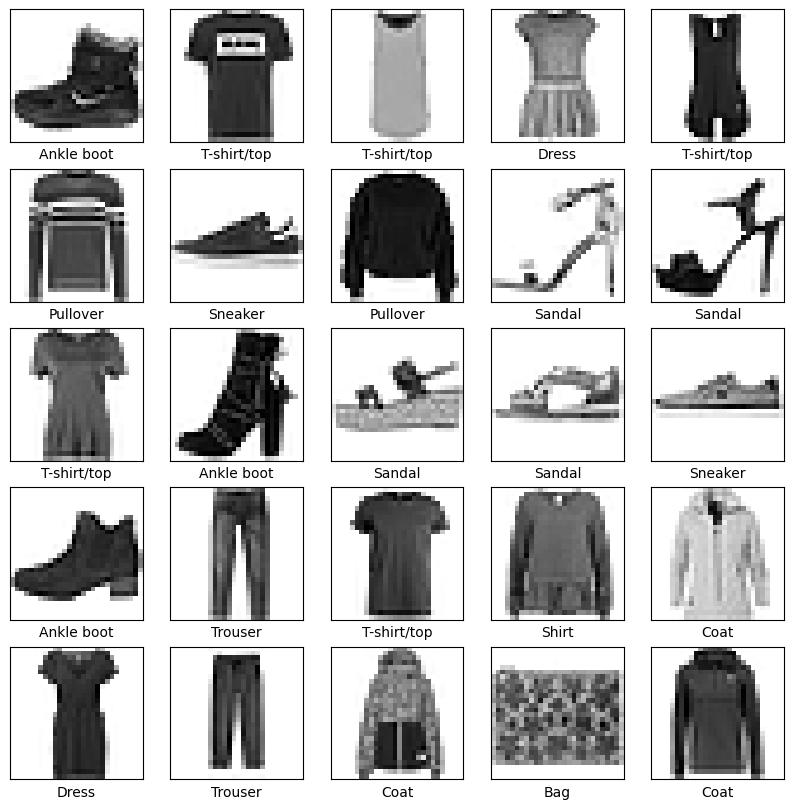

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


# Class labels for the Fashion MNIST dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize the first 25 images from the training set
def plot_sample_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Show the sample images from the training set
plot_sample_images(train_images, train_labels, class_names)

# Normalize the pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


## Building and Compiling the Neural Network Model

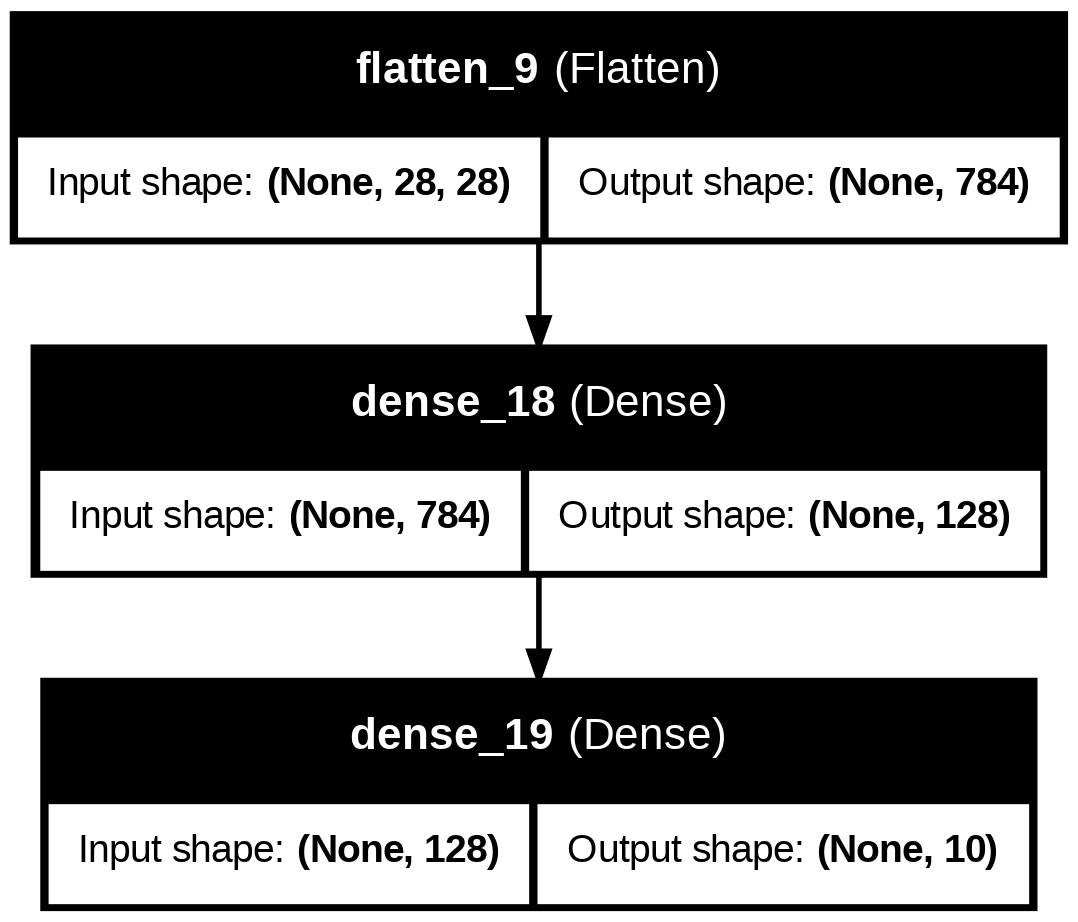

In [ ]:
# Define the model 1.ReLU activation
model_relu = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D vector of 784 values
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    layers.Dense(10, activation='softmax') # Output layer with 10 units (one for each class) and softmax activation
])

# Compile the ReLU model
model_relu.compile(optimizer='adam',  # Default optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])

from tensorflow.keras import models
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model_relu, to_file='model_reLU_plot.png', show_shapes=True, show_layer_names=True)

# Display the model plot
from IPython.display import Image
Image('model_reLU_plot.png')



In [ ]:
# Train the model
history_relu = model_relu.fit(train_images, train_labels, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8523 - loss: 0.4206 - val_accuracy: 0.8646 - val_loss: 0.3855
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8671 - loss: 0.3629 - val_accuracy: 0.8724 - val_loss: 0.3556
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8814 - loss: 0.3247 - val_accuracy: 0.8767 - val_loss: 0.3391
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8852 - loss: 0.3063 - val_accuracy: 0.8798 - val_loss: 0.3399
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8940 - loss: 0.2895 - val_accuracy: 0.8875 - val_loss: 0.3179
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8967 - loss: 0.2743 - val_accuracy: 0.8828 - val_loss: 0.3245
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9032 - loss: 0.2621 - val_accuracy: 0.8843 - val_loss: 0.3264
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9069 - loss: 0.25

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_relu.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 2ms/step - accuracy: 0.8838 - loss: 0.3409

Test accuracy: 0.8838000297546387


In [ ]:
# Model 2: Sigmoid activation
model_sigmoid = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

# Compile the Sigmoid model
model_sigmoid.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the Sigmoid model
history_sigmoid = model_sigmoid.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7446 - loss: 0.7859 - val_accuracy: 0.8518 - val_loss: 0.4223
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8505 - loss: 0.4150 - val_accuracy: 0.8552 - val_loss: 0.3953
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8696 - loss: 0.3648 - val_accuracy: 0.8598 - val_loss: 0.3801
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8755 - loss: 0.3482 - val_accuracy: 0.8713 - val_loss: 0.3579
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8835 - loss: 0.3223 - val_accuracy: 0.8763 - val_loss: 0.3443
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8881 - loss: 0.3085 - val_accuracy: 0.8732 - val_loss: 0.3611
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8915 - loss: 0.2929 - val_accuracy: 0.8825 - val_loss: 0.3236
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8947 - loss: 0.2859 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_sigmoid.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 1s - 3ms/step - accuracy: 0.8774 - loss: 0.3379

Test accuracy: 0.8773999810218811


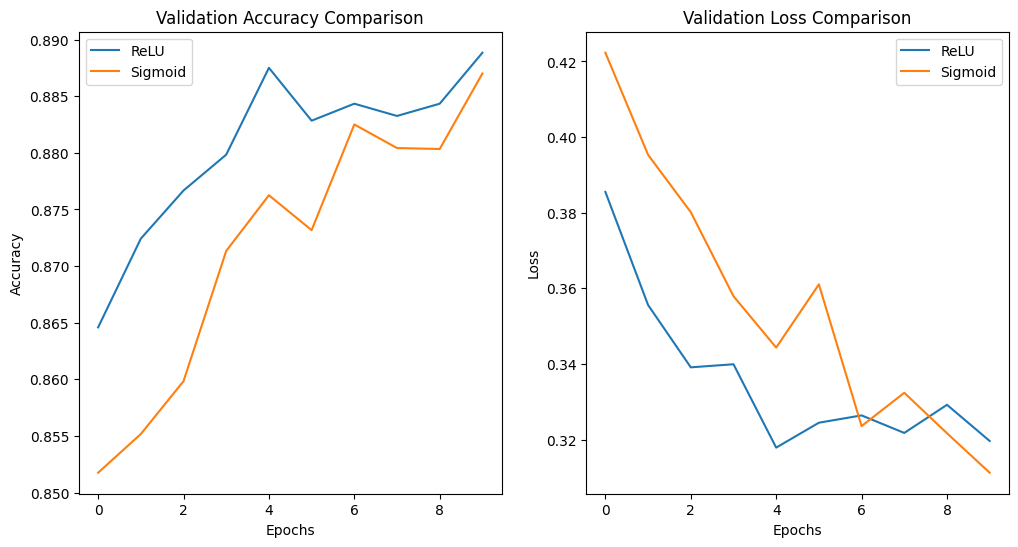

In [ ]:
# Function to compare activation functions visually
def plot_activation_comparison(history_relu, history_sigmoid):
    plt.figure(figsize=(12, 6))

    # Accuracy comparison plot
    plt.subplot(1, 2, 1)
    plt.plot(history_relu.history['val_accuracy'], label='ReLU')
    plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss comparison plot
    plt.subplot(1, 2, 2)
    plt.plot(history_relu.history['val_loss'], label='ReLU')
    plt.plot(history_sigmoid.history['val_loss'], label='Sigmoid')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot comparison between ReLU and Sigmoid models
plot_activation_comparison(history_relu, history_sigmoid)

In [ ]:
# Using SGD optimizer
model_sgd = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model_sgd.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(train_images, train_labels, epochs=10, validation_split=0.2)


# Evaluate the model on the test set
test_loss, test_acc = model_sgd.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6618 - loss: 1.0578 - val_accuracy: 0.8133 - val_loss: 0.5688
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8151 - loss: 0.5546 - val_accuracy: 0.8313 - val_loss: 0.4978
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8353 - loss: 0.4860 - val_accuracy: 0.8388 - val_loss: 0.4728
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8396 - loss: 0.4650 - val_accuracy: 0.8438 - val_loss: 0.4542
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8470 - loss: 0.4432 - val_accuracy: 0.8471 - val_loss: 0.4440
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8506 - loss: 0.4319 - val_accuracy: 0.8464 - val_loss: 0.4399
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8540 - loss: 0.4176 - val_accuracy: 0.8538 - val_loss: 0.4179
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8575 - loss: 0.4117 -

In [ ]:
# Model with Dropout for regularization
model_dropout = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer with a 50% dropout rate
    layers.Dense(10, activation='softmax')
])
model_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(train_images, train_labels, epochs=10, validation_split=0.2)
# Evaluate the model on the test set
test_loss, test_acc = model_dropout.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7119 - loss: 0.8280 - val_accuracy: 0.8359 - val_loss: 0.4499
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8235 - loss: 0.4997 - val_accuracy: 0.8531 - val_loss: 0.3982
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8376 - loss: 0.4462 - val_accuracy: 0.8583 - val_loss: 0.3880
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8457 - loss: 0.4241 - val_accuracy: 0.8616 - val_loss: 0.3785
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8520 - loss: 0.4092 - val_accuracy: 0.8657 - val_loss: 0.3762
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8514 - loss: 0.4027 - val_accuracy: 0.8748 - val_loss: 0.3504
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8595 - loss: 0.3853 - val_accuracy: 0.8686 - val_loss: 0.3472
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8589 - loss: 0.38

ReLU (Rectified Linear Unit)
Accuracy: 0.8838

Sigmoid
Accuracy: 0.8774

SGD (Stochastic Gradient Descent) Optimizer
Accuracy: 0.8520

Model with Dropout for Regularization
Accuracy: 0.8738